# Lab 06 - EXTRA - Gabarito

#### O Banco de dados *Default*

Vamos utilizar um banco de dados conhecido, o *Default*. Nele, existem características de pessoas que são ou não inadimplentes.

In [1]:
import pandas as pd

# URL do arquivo Excel raw no GitHub
url = "https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Default.xlsx"

# Carrega o arquivo Excel em um DataFrame
df = pd.read_excel(url)

df.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [2]:
# Converte as variáveis categóricas em numéricas usando codificação one-hot
df_encoded = pd.get_dummies(df, columns=['default', 'student'], drop_first=True)

df_encoded

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,False,False
1,2,817.180407,12106.134700,False,True
2,3,1073.549164,31767.138947,False,False
3,4,529.250605,35704.493935,False,False
4,5,785.655883,38463.495879,False,False
...,...,...,...,...,...
9995,9996,711.555020,52992.378914,False,False
9996,9997,757.962918,19660.721768,False,False
9997,9998,845.411989,58636.156984,False,False
9998,9999,1569.009053,36669.112365,False,False


In [3]:
# Divide os dados em features (X) e target (y)
X = df_encoded[['balance', 'income', 'student_Yes']]
y = df_encoded['default_Yes']

In [5]:
from sklearn.model_selection import train_test_split

# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

print(X_treino)

          balance        income  student_Yes
9254  1018.568130  34103.879520        False
1561    62.170050  28660.747508        False
1670  1046.743543  40822.447413        False
6087   763.735280  44125.718725        False
6669   697.248633  25730.917583         True
...           ...           ...          ...
5734   865.697004  33541.046380        False
5191   493.629546  20500.212632         True
5390   722.029162  26984.256287        False
860    163.939823  21083.004510         True
7270   637.338107  49657.394282        False

[8000 rows x 3 columns]


#### Linear Discriminant Analysis (LDA)

Como talvez tenham percebido, treinar um modelo qualquer, especialmente os menos computacionalmente intensivos, não é extremamente complicado. Para o nosso interesse, é mais importante entender a intuição geral do modelo, além de suas vantagens e desvantagens, sempre tentando também comparar eles com outros modelos. Vamos agora para o modelo LDA, ou Linear Discriminant Analysis.

O LDA é um método de análise estatística usado para encontrar a melhor combinação linear de características (variáveis) que maximiza a separação entre duas ou mais classes em um conjunto de dados. Em outras palavras, o LDA ajuda a encontrar um "caminho" ou projeção das características que torna mais fácil distinguir entre diferentes grupos de dados.

Aqui estão os passos básicos de como o LDA funciona:

* Calculando as Médias: Para cada classe, o LDA calcula a média das características. Isso significa que ele encontra o valor médio de cada característica para cada grupo de dados. Isso é chamado de "vetor médio" para cada classe.

* Calculando a Dispersão: O LDA também calcula a dispersão ou variabilidade das características dentro de cada classe. Isso ajuda a medir o quão espalhados estão os pontos de dados dentro de cada grupo.

* Encontrando a Melhor Projeção: O objetivo do LDA é encontrar a projeção (combinação linear das características) que maximize a separação entre as médias das classes e minimize a dispersão dentro de cada classe. Em outras palavras, ele tenta encontrar um "caminho" ao longo do qual os dados de cada classe estão mais agrupados e separados dos dados das outras classes.

Em resumo, o LDA é uma técnica que ajuda a encontrar a melhor maneira de separar dados em diferentes grupos com base em suas características. É útil em tarefas de classificação, como reconhecimento de padrões e detecção de padrões em dados multidimensionais.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importando o modelo do SKlearn

Como Já separamos anteriormente os dados de treino e teste, vamos já partir para o treino do modelo:

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_treino, y_treino)

LinearDiscriminantAnalysis()

Prevendo no banco de teste:

In [9]:
y_pred_lda = lda.predict(X_teste)

y_pred_lda

array([False, False, False, ..., False, False, False])

Agora, vamos avaliar o modelo

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred_lda) # Valores preditos pelo modelo LDA

print(f"Acurácia: {accuracy}")


Acurácia: 0.968


A acurácia geral foi minimamente maior do que a da Regressão Logística (96,8% contra 96,4%). Vamos ver a matriz de confusão:

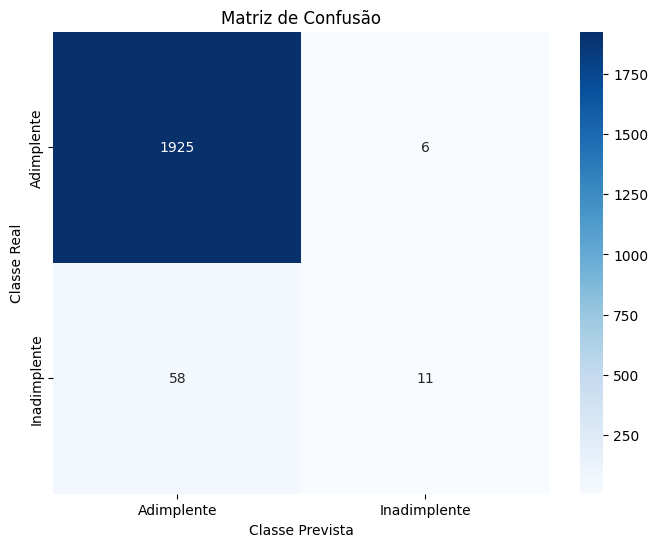

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

mat_conf_lda = confusion_matrix(y_teste, y_pred_lda)


# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_lda, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


O problema na classe de inadimplentes permanece, ainda só 11 de 69 foram classificados corretamente. Podemos confirmar isso olhando para o relatório de classificação:

In [14]:
rel_class = classification_report(y_teste, y_pred_lda)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1931
        True       0.65      0.16      0.26        69

    accuracy                           0.97      2000
   macro avg       0.81      0.58      0.62      2000
weighted avg       0.96      0.97      0.96      2000



Aqui, podemos ver que, mesmo que haja uma maior precisão da classe minoritária (inadimplentes) ainda temos um problema enorme com o recall, gerando uma alta taxa de falsos negativos. Isto é, inadimplentes que estão sendo classificados como adimplentes. Também é sempre importante olhar para o F1-score, que é a média harmonica de precision e recall. Aqui, vemos que o F1-score para a classe 1 (inadimplentes) é baixíssimo (0,26), lembrando que todas estas medidas variam de 0 a 1.

#### Quadratic Discriminant Analysis (QDA)

O QDA é um método estatístico que, assim como o LDA, é usado para separar dados em diferentes classes com base em suas características. No entanto, o QDA assume que as classes têm diferentes matrizes de covariância. Agora, vamos quebrar isso em partes:

* Matrizes de Covariância Diferentes: O QDA parte do pressuposto de que as diferentes classes em seus dados podem ter dispersões diferentes em várias direções. Isso significa que as variâncias e covariâncias (como a relação entre duas características) entre as classes podem ser diferentes.

* Classificação com Superfícies Não-Lineares: Devido à suposição de matrizes de covariância diferentes, o QDA é capaz de modelar relações mais complexas entre as classes. Isso significa que ele pode capturar fronteiras de decisão não-lineares, permitindo maior flexibilidade na classificação. (Nota: Lembre-se que modelos mais flexíveis tem suas vantagens e desvantagens).

* Processo de Treinamento: O treinamento do QDA envolve calcular as matrizes de covariância para cada classe. Isso é feito estimando a matriz de covariância de cada classe com base nos dados de treinamento. Em seguida, o modelo usa essas informações para calcular as probabilidades de pertencimento de uma nova amostra a cada classe.

* Tomada de Decisões: Quando você deseja classificar uma nova amostra de dados, o QDA calcula a probabilidade de pertencimento a cada classe com base nas matrizes de covariância estimadas e usa essas probabilidades para fazer a classificação final. A classe com a maior probabilidade é a classe prevista.

Em resumo, o QDA é uma técnica de classificação que leva em consideração a variabilidade das classes, permitindo que o modelo se adapte a relações não-lineares entre os dados. Isso pode ser útil quando as classes têm diferentes padrões de dispersão e quando as fronteiras de decisão não são estritamente lineares.

1. Importando o modelo:

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

2. Criando o objeto e treinando o modelo:

In [16]:
# Crie e treine o modelo QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_treino, y_treino)

QuadraticDiscriminantAnalysis()

3. Prevendo no banco de teste

In [17]:
# Faça previsões no conjunto de teste
y_pred_qda = qda.predict(X_teste)

y_pred_qda

array([False, False, False, ..., False, False, False])

4. Avaliando o desempenho do modelo:

Agora, tente pensar sozinho um pouco sobre a performance do modelo, e compare os resultados com os outros dois modelos.

a) Acurácia

In [18]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_teste, y_pred_qda)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9675


b) Matriz de Confusão

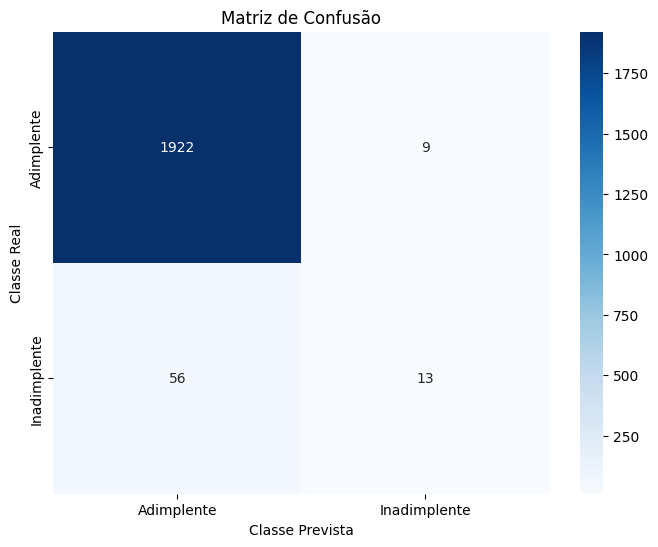

In [19]:
mat_conf_qda = confusion_matrix(y_teste, y_pred_qda)


# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_qda, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

c) Relatório de Classificação

In [20]:
rel_class = classification_report(y_teste, y_pred_qda)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1931
        True       0.59      0.19      0.29        69

    accuracy                           0.97      2000
   macro avg       0.78      0.59      0.63      2000
weighted avg       0.96      0.97      0.96      2000



Agora, iremos para os dois últimos modelos que veremos nesta aula: Naive Bayes e K-Neighbors:

#### Naive-Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB # Modelo Naive-Bayes

# Crie e treine o modelo Naive Bayes (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_treino, y_treino)

# Faça previsões no conjunto de teste
y_pred_NB = nb_model.predict(X_teste)

# Imprimindo o array de predições

y_pred_NB


array([False, False, False, ..., False, False, False])

a) Accuracy

In [22]:
accuracy = accuracy_score(y_teste, y_pred_NB)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9655


b) Confusion Matrix

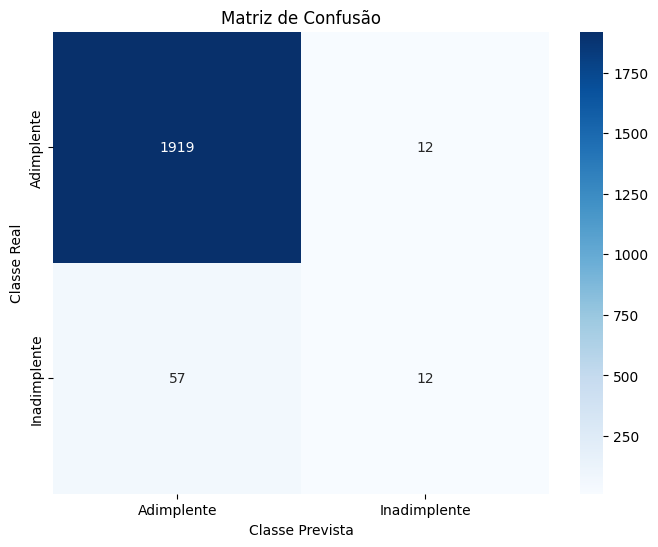

In [23]:
mat_conf_NB = confusion_matrix(y_teste, y_pred_NB)


# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_NB, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

#### K-Nearest Neighbors (KNN)

A ideia central do KNN é que os objetos (ou pontos de dados) que são semelhantes tendem a estar próximos uns dos outros em um espaço de características. Portanto, o KNN funciona com base na proximidade entre os pontos de dados em um espaço de características.


2. Parâmetro K:

O "K" em KNN representa o número de vizinhos mais próximos que serão considerados para tomar uma decisão. Por exemplo, se K=3, o algoritmo considerará os três vizinhos mais próximos de um ponto de dados para tomar uma decisão.
3. Classificação com KNN:

Para classificação, o KNN determina a classe de um novo ponto de dados com base na classe da maioria dos K vizinhos mais próximos.
Por exemplo, se a maioria dos K vizinhos mais próximos de um novo ponto de dados pertence à classe "A", o KNN classificará o novo ponto como "A".
4. Regressão com KNN:

Para regressão, o KNN calcula a média (ou outra medida estatística) dos valores-alvo dos K vizinhos mais próximos e usa esse valor para fazer previsões.
Por exemplo, se estamos prevendo o preço de uma casa, o KNN calculará a média dos preços das K casas mais próximas para fazer a previsão.
5. Métrica de Distância:

O KNN usa uma métrica de distância (geralmente a distância Euclidiana) para medir a proximidade entre pontos de dados no espaço de características.
A métrica de distância determina como os pontos são comparados em termos de proximidade.
6. Escolha de K:

A escolha adequada de K é importante. Um valor muito pequeno de K pode levar a um modelo muito sensível a outliers (muito flexível), enquanto um valor muito grande de K pode tornar o modelo menos sensível a padrões sutis nos dados (muito rígido). Uma boa ideia é a de testar varios valores e ver qual performa melhor no banco de teste.

7. Treinamento do Modelo:

No treinamento, o KNN simplesmente armazena todos os pontos de dados com seus rótulos em uma estrutura de dados para que eles possam ser usados para previsões futuras.

8. Previsões:

Para fazer uma previsão com o KNN, você encontra os K vizinhos mais próximos do novo ponto de dados usando a métrica de distância.
Em seguida, toma uma decisão com base na maioria das classes (classificação) ou na média dos valores-alvo (regressão) dos vizinhos mais próximos.

Aplicações:

O KNN é usado em uma variedade de tarefas, como classificação de documentos, recomendação de produtos, diagnóstico médico, detecção de anomalias e muito mais.
Em resumo, o KNN é um método de aprendizado de máquina que faz previsões com base na proximidade entre pontos de dados em um espaço de características. Ele é simples de entender e implementar, mas a escolha apropriada de K e da métrica de distância é fundamental para seu desempenho.

In [24]:
from sklearn.neighbors import KNeighborsClassifier # Importando o KNN

# Crie e treine o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Você pode ajustar o número de vizinhos (K) aqui
knn_model.fit(X_treino, y_treino)


# Faça previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_teste)

y_pred_knn


array([False, False, False, ..., False, False, False])

In [25]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_teste, y_pred_knn)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9645


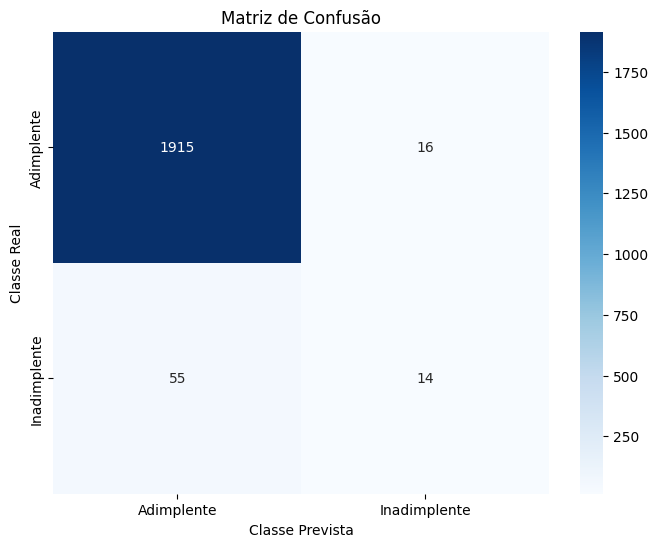

In [26]:
mat_conf_KNN = confusion_matrix(y_teste, y_pred_knn)


# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_KNN, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [27]:
report = classification_report(y_teste, y_pred_knn)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1931
        True       0.47      0.20      0.28        69

    accuracy                           0.96      2000
   macro avg       0.72      0.60      0.63      2000
weighted avg       0.95      0.96      0.96      2000



## Exercícios

### Banco de Dados

1- Agora é sua vez, vamos pegar um outro banco de dados. Na pasta do laboratório, há um .csv chamado "Healthcare-Diabetes.csv", importe ele.

In [28]:
url = "https://raw.githubusercontent.com/PedroSchmalz/FLP0478/refs/heads/main/book/aulas/aula6/dataset/Healthcare-Diabetes.csv"

In [29]:
df2 = pd.read_csv(url)

df2

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


No seguinte kaggle ([link](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/)) você encontra mais informações sobre o banco.

In [30]:
df2['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.656069
1,0.343931


2 - Faça uma matriz de correlação das variáveis independentes. Há alguma variável que pareça ser muito correlacionada com outra (muito próximo de 1)?

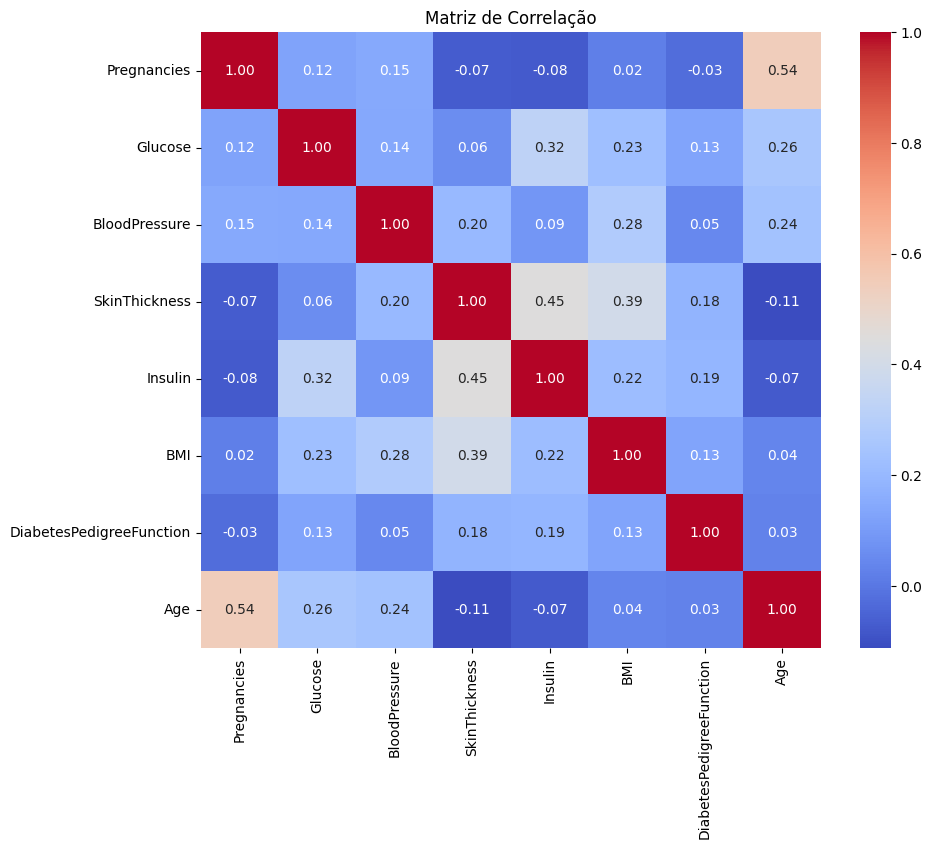

In [31]:
# Criando um novo banco só com as variáveis explicativas
df2_ind = df2.drop(['Id', 'Outcome'], axis=1)

# A matriz de correlação pode ser calculada assim:
correlation_matrix = df2_ind.corr()

# Agora, crie uma matriz de calor (heatmap) com o Seaborn
plt.figure(figsize=(10, 8))  # Ajuste o tamanho do gráfico, se necessário
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Exiba o gráfico
plt.title("Matriz de Correlação")
plt.show()

3 - Separe as colunas em um vetor X de features e o target (Outcome). Também separe o banco entre treino e teste (com 20% para teste).

In [32]:
# Divide os dados em features (X) e target (y)
X = df2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]
y = df2['Outcome']


# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

print(X_treino)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
2124            4      109             64             44       99  34.8   26
2716            1      118             58             36       94  33.3   23
2232            2      123             48             32      165  42.1   26
261             3      141              0              0        0  30.0   27
2059            8       84             74             31        0  38.3   39
...           ...      ...            ...            ...      ...   ...  ...
1638            4       95             64              0        0  32.0   31
1095           10      179             70              0        0  35.1   37
1130            5      103            108             37        0  39.2   65
1294            1       97             64             19       82  18.2   21
860             7       81             78             40       48  46.7   42

[2214 rows x 7 columns]


In [33]:
y_treino

,Outcome
2124,1
2716,0
2232,0
261,1
2059,0
...,...
1638,1
1095,0
1130,0
1294,0


### Regressão Logística

4 - Agora, treine um modelo de regressão logística.

In [36]:
from sklearn.linear_model import LogisticRegression


modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino)

LogisticRegression()

5 - Faça a predição dos valores do banco de teste e imprima o array de predições.

In [37]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

a) Apresente a acurácia:

In [38]:
accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")


Acurácia: 0.7689530685920578


b) Apresente a matriz de confusão

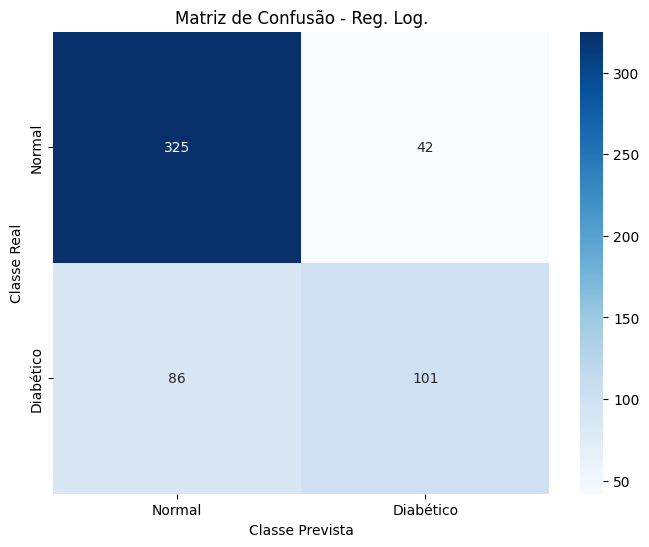

In [39]:
mat_conf = confusion_matrix(y_teste, y_pred)


# Defina os rótulos das classes
class_names = ['Normal', 'Diabético']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Reg. Log.')
plt.show()

c) Por fim, apresente o relatório de classificação

In [40]:
report = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       367
           1       0.71      0.54      0.61       187

    accuracy                           0.77       554
   macro avg       0.75      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554



d) O modelo foi bem? Comente sobre

Resposta: Obtivemos um resultado razoável, considerando que é um modelo simples, com pouca intensidade computacional. Ainda temos um recall ruim/médio para a classe de diabéticos (1), mas muito melhor que o observado no caso dos inadimplentes. Isso se deve ao fato de que também temos um maior número de observações da classe minoritária se comparado com o outro banco.

e) Agora, vamos pegar esses valores do relatório de classificação de forma separada, isso vai ser útil depois. Pegue precision, recall e f1-score e salve-os em uma variável com nome adequado para depois. Imprima os valores e veja se batem com o do relatório de classificação. Dica: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

In [41]:
# Dica:

from sklearn.metrics import precision_recall_fscore_support

resultados = precision_recall_fscore_support(y_teste, y_pred, average=None, labels=[0, 1])


### Resolução

precisao, revocacao, f1, suporte = resultados

# Crie um dicionário com os resultados
resultados_dict = {
    'Precisão_LR': precisao,
    'Revocação_LR': revocacao,
    'F1-score_LR': f1,
    'Suporte': suporte
}

# Crie um DataFrame a partir do dicionário
df_resultados_LR = pd.DataFrame(resultados_dict)

# Defina os índices para as classes, se aplicável
indices_classes = ['Normal', 'Diabético']  # Substitua pelas suas próprias classes, se necessário
df_resultados_LR.index = indices_classes

# Exiba o DataFrame
print(df_resultados_LR)



           Precisão_LR  Revocação_LR  F1-score_LR  Suporte
Normal        0.790754      0.885559     0.835476      367
Diabético     0.706294      0.540107     0.612121      187


### LDA

6 - Agora, treine um modelo LDA e faça as predições no banco de teste.

In [42]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_treino, y_treino)


# Treinando o modelo
lda.fit(X_treino, y_treino)


y_pred = lda.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

a) Apresente a acurácia

In [43]:
accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")

Acurácia: 0.7653429602888087


b) Apresente a matriz de confusão:

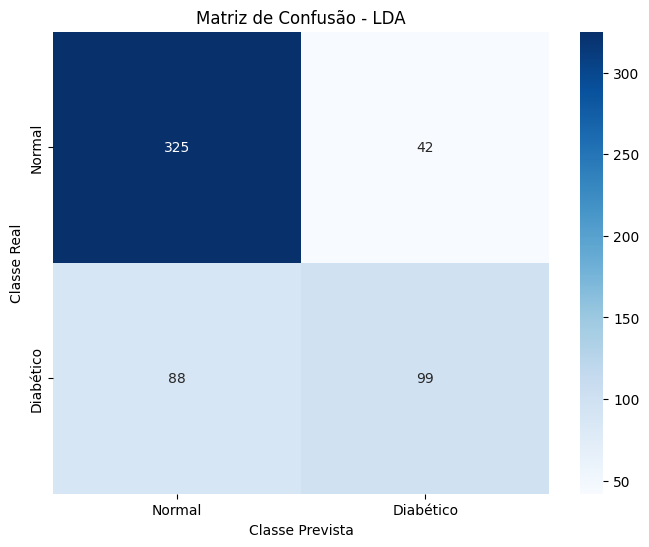

In [44]:
mat_conf = confusion_matrix(y_teste, y_pred)


# Defina os rótulos das classes
class_names = ['Normal', 'Diabético']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - LDA')
plt.show()

c) Por fim, o relatório de classificação. Os resultados são melhores do que o da regressão logística? Comente sobre.

In [45]:
report = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       367
           1       0.70      0.53      0.60       187

    accuracy                           0.77       554
   macro avg       0.74      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554



d) Novamente, pegue os valores separados e os salve em um novo dataframe.

In [46]:
resultados_lda = precision_recall_fscore_support(y_teste, y_pred, average=None, labels=[0, 1])


### Resolução

precisao, revocacao, f1, suporte = resultados_lda

# Crie um dicionário com os resultados
resultados_lda_dict = {
    'Precisão_LDA': precisao,
    'Revocação_LDA': revocacao,
    'F1-score_LDA': f1,
    'Suporte': suporte
}

# Crie um DataFrame a partir do dicionário
df_resultados_lda = pd.DataFrame(resultados_lda_dict)

# Defina os índices para as classes, se aplicável
indices_classes = ['Normal', 'Diabético']  # Substitua pelas suas próprias classes, se necessário
df_resultados_lda.index = indices_classes

# Exiba o DataFrame
print(df_resultados_lda)

           Precisão_LDA  Revocação_LDA  F1-score_LDA  Suporte
Normal         0.786925       0.885559      0.833333      367
Diabético      0.702128       0.529412      0.603659      187


e) Junte com o banco que você criou no exercício 5-e

In [47]:
# Concatene os DataFrames ao longo das colunas (axis=1)
df_resultados = pd.concat([df_resultados_LR, df_resultados_lda], axis=1)

# Exiba o DataFrame resultante
df_resultados

,Precisão_LR,Revocação_LR,F1-score_LR,Suporte,Precisão_LDA,Revocação_LDA,F1-score_LDA,Suporte
Normal,0.790754,0.885559,0.835476,367,0.786925,0.885559,0.833333,367
Diabético,0.706294,0.540107,0.612121,187,0.702128,0.529412,0.603659,187


### QDA

7 - Treine um modelo QDA e faça as predições no banco de teste

In [48]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_treino, y_treino)

# Treinando o modelo
qda.fit(X_treino, y_treino)


y_pred = qda.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,

a) Apresente o relatório de classificação

In [49]:
report = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       367
           1       0.66      0.58      0.62       187

    accuracy                           0.76       554
   macro avg       0.73      0.72      0.72       554
weighted avg       0.75      0.76      0.76       554



b) Salve precisão, recall e f1-score em um dataframe

In [50]:
resultados_qda = precision_recall_fscore_support(y_teste, y_pred, average=None, labels=[0, 1])


### Resolução

precisao, revocacao, f1, suporte = resultados_qda

# Crie um dicionário com os resultados
resultados_qda_dict = {
    'Precisão_QDA': precisao,
    'Revocação_QDA': revocacao,
    'F1-score_QDA': f1,
    'Suporte': suporte
}

# Crie um DataFrame a partir do dicionário
df_resultados_qda = pd.DataFrame(resultados_qda_dict)

# Defina os índices para as classes, se aplicável
indices_classes = ['Normal', 'Diabético']  # Substitua pelas suas próprias classes, se necessário
df_resultados_qda.index = indices_classes

# Exiba o DataFrame
print(df_resultados_qda)

           Precisão_QDA  Revocação_QDA  F1-score_QDA  Suporte
Normal         0.800000       0.850136      0.824306      367
Diabético      0.664634       0.582888      0.621083      187


c) Junte com o banco de dados de resultados por modelo, criado no exercício 6-e

In [51]:
# Concatene os DataFrames ao longo das colunas (axis=1)
df_resultados = pd.concat([df_resultados, df_resultados_qda], axis=1)

# Exiba o DataFrame resultante
df_resultados

,Precisão_LR,Revocação_LR,F1-score_LR,Suporte,Precisão_LDA,Revocação_LDA,F1-score_LDA,Suporte,Precisão_QDA,Revocação_QDA,F1-score_QDA,Suporte
Normal,0.790754,0.885559,0.835476,367,0.786925,0.885559,0.833333,367,0.800000,0.850136,0.824306,367
Diabético,0.706294,0.540107,0.612121,187,0.702128,0.529412,0.603659,187,0.664634,0.582888,0.621083,187


### NB

8 - Treine um Modelo Naive-bayes

In [52]:
# Crie e treine o modelo Naive Bayes (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_treino, y_treino)

# Faça previsões no conjunto de teste
y_pred = nb_model.predict(X_teste)

# Imprimindo o array de predições

y_pred


array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

a) Imprima o relatório de classificação

In [53]:
report = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       367
           1       0.66      0.61      0.63       187

    accuracy                           0.76       554
   macro avg       0.73      0.72      0.73       554
weighted avg       0.76      0.76      0.76       554



b) Salve precision, recall e f1-score em um dataframe separado

In [54]:
resultados_NB = precision_recall_fscore_support(y_teste, y_pred, average=None, labels=[0, 1])


### Resolução

precisao, revocacao, f1, suporte = resultados_NB

# Crie um dicionário com os resultados
resultados_NB_dict = {
    'Precisão_NB': precisao,
    'Revocação_NB': revocacao,
    'F1-score_NB': f1,
    'Suporte': suporte
}

# Crie um DataFrame a partir do dicionário
df_resultados_NB = pd.DataFrame(resultados_NB_dict)

# Defina os índices para as classes, se aplicável
indices_classes = ['Normal', 'Diabético']  # Substitua pelas suas próprias classes, se necessário
df_resultados_NB.index = indices_classes

# Exiba o DataFrame
print(df_resultados_NB)

           Precisão_NB  Revocação_NB  F1-score_NB  Suporte
Normal        0.808399      0.839237     0.823529      367
Diabético     0.658960      0.609626     0.633333      187


c) Junte com o dataframe de resultados dos outros modelos

In [55]:
# Concatene os DataFrames ao longo das colunas (axis=1)
df_resultados = pd.concat([df_resultados, df_resultados_NB], axis=1)

# Exiba o DataFrame resultante
df_resultados

,Precisão_LR,Revocação_LR,F1-score_LR,Suporte,Precisão_LDA,Revocação_LDA,F1-score_LDA,Suporte,Precisão_QDA,Revocação_QDA,F1-score_QDA,Suporte,Precisão_NB,Revocação_NB,F1-score_NB,Suporte
Normal,0.790754,0.885559,0.835476,367,0.786925,0.885559,0.833333,367,0.800000,0.850136,0.824306,367,0.808399,0.839237,0.823529,367
Diabético,0.706294,0.540107,0.612121,187,0.702128,0.529412,0.603659,187,0.664634,0.582888,0.621083,187,0.658960,0.609626,0.633333,187


### KNN

9 - Por fim, treine também um modelo KNN

In [56]:
# Crie e treine o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Você pode ajustar o número de vizinhos (K) aqui
knn_model.fit(X_treino, y_treino)


# Faça previsões no conjunto de teste
y_pred = knn_model.predict(X_teste)

y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,

a) Imprima o relatório de classificação.

In [57]:
report = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       367
           1       0.91      0.93      0.92       187

    accuracy                           0.95       554
   macro avg       0.94      0.94      0.94       554
weighted avg       0.95      0.95      0.95       554



b) Salve precision, recall e f1-score em um dataframe separado

In [58]:
resultados_KNN = precision_recall_fscore_support(y_teste, y_pred, average=None, labels=[0, 1])


### Resolução

precisao, revocacao, f1, suporte = resultados_KNN

# Crie um dicionário com os resultados
resultados_KNN_dict = {
    'Precisão_KNN': precisao,
    'Revocação_KNN': revocacao,
    'F1-score_KNN': f1,
    'Suporte': suporte
}

# Crie um DataFrame a partir do dicionário
df_resultados_KNN = pd.DataFrame(resultados_KNN_dict)

# Defina os índices para as classes, se aplicável
indices_classes = ['Normal', 'Diabético']  # Substitua pelas suas próprias classes, se necessário
df_resultados_KNN.index = indices_classes

# Exiba o DataFrame
print(df_resultados_KNN)

           Precisão_KNN  Revocação_KNN  F1-score_KNN  Suporte
Normal         0.964187       0.953678      0.958904      367
Diabético      0.910995       0.930481      0.920635      187


c) Por fim, junte estes resultados com o dataframe completo de resultados

In [59]:
# Concatene os DataFrames ao longo das colunas (axis=1)
df_resultados_final = pd.concat([df_resultados, df_resultados_KNN], axis=1)

# Exiba o DataFrame resultante
df_resultados_final

,Precisão_LR,Revocação_LR,F1-score_LR,Suporte,Precisão_LDA,Revocação_LDA,F1-score_LDA,Suporte,Precisão_QDA,Revocação_QDA,F1-score_QDA,Suporte,Precisão_NB,Revocação_NB,F1-score_NB,Suporte,Precisão_KNN,Revocação_KNN,F1-score_KNN,Suporte
Normal,0.790754,0.885559,0.835476,367,0.786925,0.885559,0.833333,367,0.800000,0.850136,0.824306,367,0.808399,0.839237,0.823529,367,0.964187,0.953678,0.958904,367
Diabético,0.706294,0.540107,0.612121,187,0.702128,0.529412,0.603659,187,0.664634,0.582888,0.621083,187,0.658960,0.609626,0.633333,187,0.910995,0.930481,0.920635,187


Comparação dos modelos

10 - Pegue o dataframe criado em 9-c e drope as colunas de suporte. Depois, transforme do formato long (atual) para o formato wide.

In [60]:
# Remova a coluna "Suporte"
df_resultados_final = df_resultados_final.drop(columns=['Suporte'])

# Use a função pivot para transformar de long para wide
df_wide = df_resultados_final.T

# Reinicie o índice do DataFrame
df_wide = df_wide.reset_index()

# Renomeando a coluna index
df_wide = df_wide.rename(columns={"index": "Métricas"})


# Exiba o DataFrame resultante
print(df_wide)



         Métricas    Normal  Diabético
0     Precisão_LR  0.790754   0.706294
1    Revocação_LR  0.885559   0.540107
2     F1-score_LR  0.835476   0.612121
3    Precisão_LDA  0.786925   0.702128
4   Revocação_LDA  0.885559   0.529412
5    F1-score_LDA  0.833333   0.603659
6    Precisão_QDA  0.800000   0.664634
7   Revocação_QDA  0.850136   0.582888
8    F1-score_QDA  0.824306   0.621083
9     Precisão_NB  0.808399   0.658960
10   Revocação_NB  0.839237   0.609626
11    F1-score_NB  0.823529   0.633333
12   Precisão_KNN  0.964187   0.910995
13  Revocação_KNN  0.953678   0.930481
14   F1-score_KNN  0.958904   0.920635


11 - Filtre somente os valores referentes à precisão e faça um gráfico de barras comparando os resultados desta métrica.

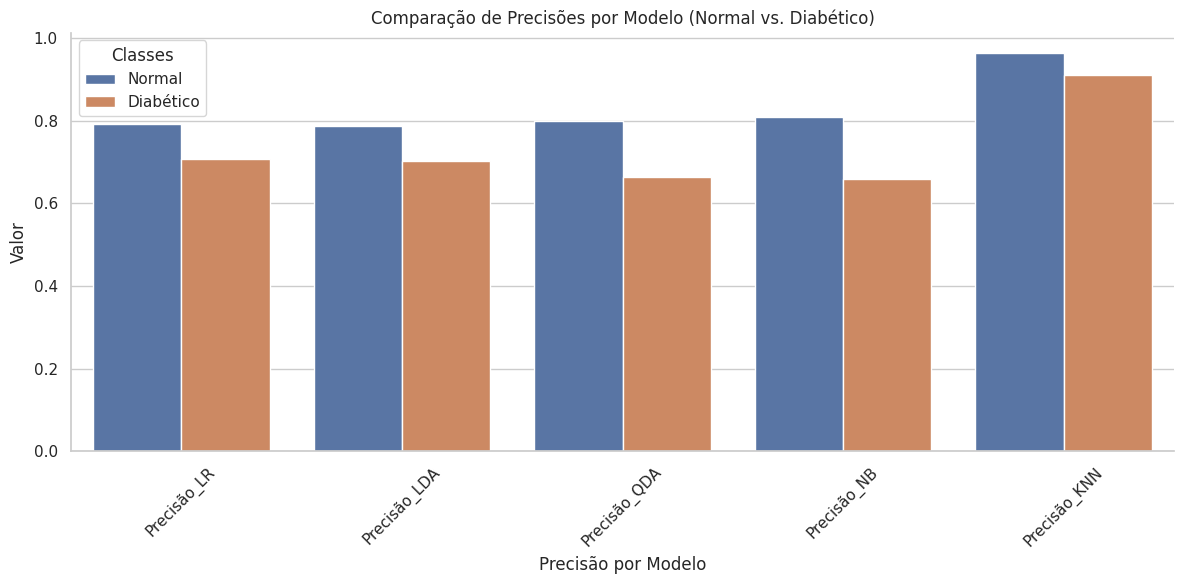

In [61]:
# Filtre as linhas onde 'index' começa com 'Precisão_'
filtro = df_wide['Métricas'].str.startswith('Precisão_')

# Aplique o filtro para selecionar as linhas desejadas
precisao_modelos = df_wide[filtro]

# Deixando a tabela em um formato melhor
prec_tidy = precisao_modelos.melt(id_vars='Métricas').rename(columns=str.title)

# Fazendo a visualização


# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário
sns.barplot(x='Métricas', y='Value', hue='Variable', data=prec_tidy)
sns.despine()

# Adicione rótulos, título e legenda
plt.xlabel('Precisão por Modelo')
plt.ylabel('Valor')
plt.title('Comparação de Precisões por Modelo (Normal vs. Diabético)')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.legend(title='Classes')

# Exiba o gráfico
plt.tight_layout()
plt.show()



12 - Qual modelo se saiu melhor nesta métrica?

Resposta: KNN

13 - Faça o mesmo do exercício 11 com o Recall (Revocação)

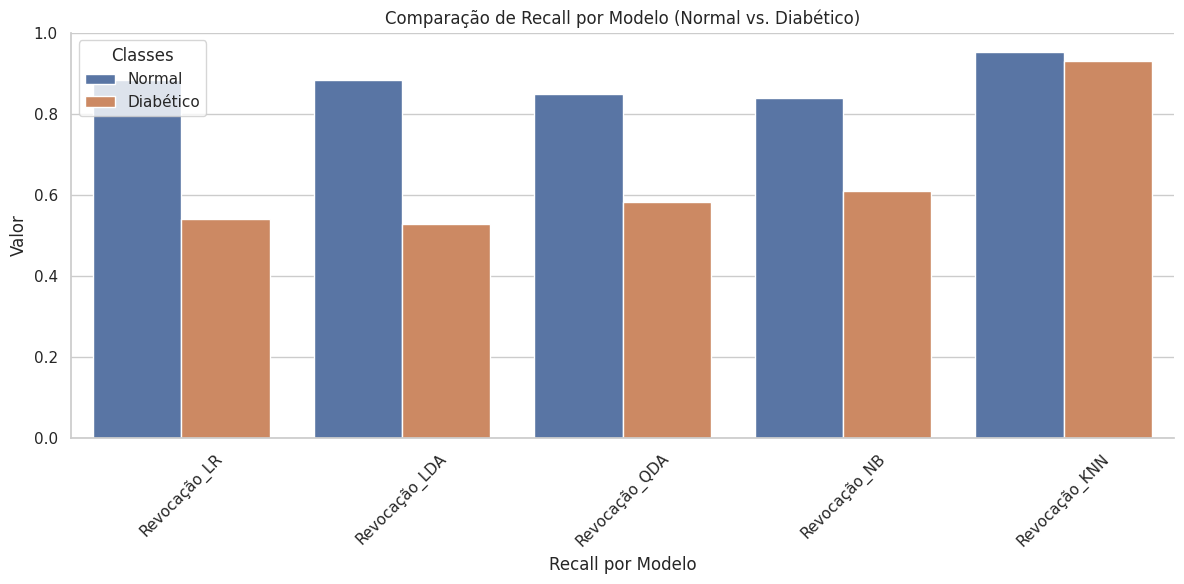

In [62]:
# Filtre as linhas onde 'index' começa com 'Revocação_'
filtro = df_wide['Métricas'].str.startswith('Revocação_')

# Aplique o filtro para selecionar as linhas desejadas
recall_modelos = df_wide[filtro]

# Deixando a tabela em um formato melhor
recall_tidy = recall_modelos.melt(id_vars='Métricas').rename(columns=str.title)

# Fazendo a visualização


# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário
sns.barplot(x='Métricas', y='Value', hue='Variable', data=recall_tidy)
sns.despine()

# Adicione rótulos, título e legenda
plt.xlabel('Recall por Modelo')
plt.ylabel('Valor')
plt.title('Comparação de Recall por Modelo (Normal vs. Diabético)')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.legend(title='Classes')

# Exiba o gráfico
plt.tight_layout()
plt.show()

14 - Qual modelo tem a menor taxa de falsos negativos (maior recall)? Os resultados são parecidos até na classe minoritária?

Resposta: KNN

15 - Por fim, compare os f1-scores da mesma forma.

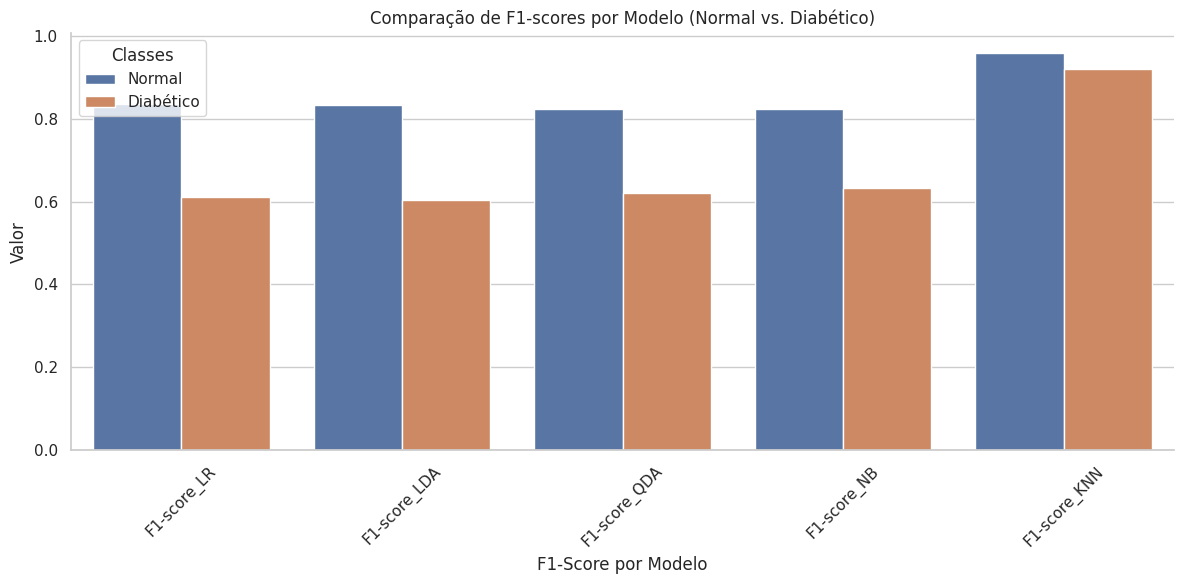

In [63]:
# Filtre as linhas onde 'index' começa com 'F1-score_'
filtro = df_wide['Métricas'].str.startswith('F1-score_')

# Aplique o filtro para selecionar as linhas desejadas
f1_modelos = df_wide[filtro]

# Deixando a tabela em um formato melhor
f1_tidy = f1_modelos.melt(id_vars='Métricas').rename(columns=str.title)

# Fazendo a visualização


# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário
sns.barplot(x='Métricas', y='Value', hue='Variable', data=f1_tidy)
sns.despine()

# Adicione rótulos, título e legenda
plt.xlabel('F1-Score por Modelo')
plt.ylabel('Valor')
plt.title('Comparação de F1-scores por Modelo (Normal vs. Diabético)')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.legend(title='Classes')

# Exiba o gráfico
plt.tight_layout()
plt.show()

16 - Qual modelo obteve melhor desempenho nesta tarefa?

Resposta: No geral, o KNN teve as melhores métricas para esta tarefa